# Arvore de Decisão

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
dados = pd.read_excel('vendas.xlsx')

In [4]:
dados.head()

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No


In [5]:
x = dados[["media_rating", "media_pedidos", "test"]]

y = dados[["cliente_comprou"]]

In [6]:
x = pd.get_dummies(x)
x.head()

,media_rating,media_pedidos,test_No,test_Yes
0,1.5,11,1,0
1,2.5,11,1,0
2,2.5,11,1,0
3,1.5,13,1,0
4,2.5,13,1,0


Com os dados convertidos, temos que converter também a coluna alvo para número. 

Utilizando o conceito de função lambda visto em aulas anteriores, iremos converter a string não para 0 e a string sim para 1.

In [15]:
y = np.where(dados['cliente_comprou'] == "no", 0, 1)


Com os dados convertidos, iremos utilizar a biblioteca `scikit-learn` que já implementa o classificador - Árvore de Decisão.

In [8]:
from sklearn import tree

In [9]:
arvore_decisao = tree.DecisionTreeClassifier()

In [10]:
modelo_ad = arvore_decisao.fit(x, y)

In [11]:
modelo_ad

DecisionTreeClassifier()

Note que por padrão utiliza-se o critério GINI para realizar a divisão.

### Criando a visualização da Árvore:

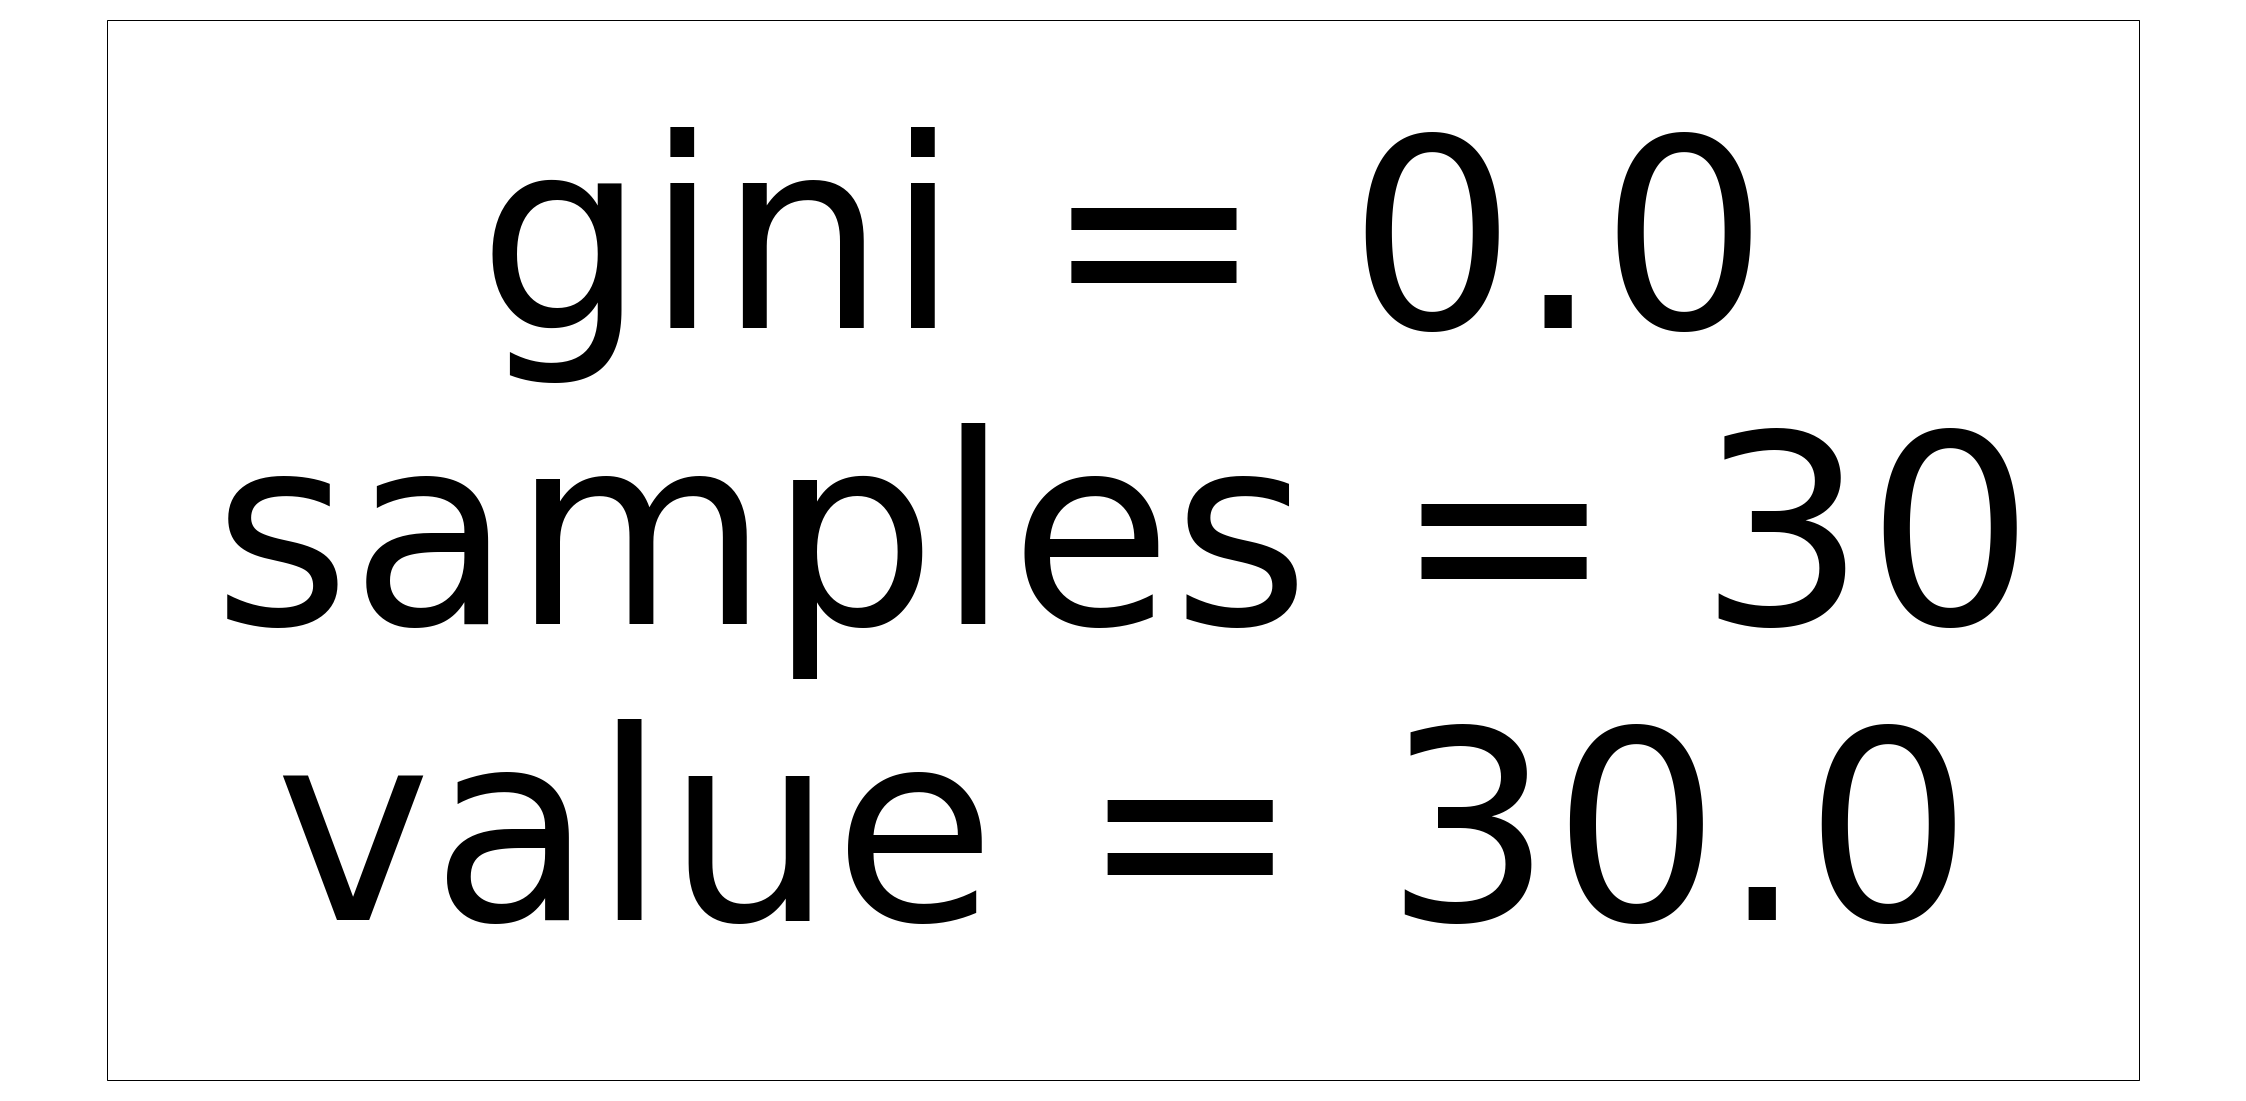

In [12]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))

_ = tree.plot_tree(modelo_ad,
                   feature_names=x.columns,
                   class_names=['Yes', "No"],
                   filled=True)